## Name: Vedant Shigwan  |  Email: vedantshigwan11@gmail.com 

# OASIS INFOBYTE Intership, feb 2025

# TASK 5 (DATA SCIENCE)

_______

# >> Sales Prediction using Python

#### Problem Statement:
Sales prediction means predicting how much of a product people will buy based on factors
such as the amount you spend to advertise your product, the segment of people you
advertise for, or the platform you are advertising on about your product.

Typically, a product and service-based business always need their Data Scientist to predict
their future sales with every step they take to manipulate the cost of advertising their
product. So let’s start the task of sales prediction with machine learning using Python.



### Import the neseccery Libraries


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

### Importing the dataset

In [3]:
df = pd.read_csv("Advertising.csv")
df

Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]

### Head function

In [4]:
df.head()

Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

### Tail function

In [5]:
df.tail()

Unnamed: 0     TV  Radio  Newspaper  Sales
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

### datatyps of each column

In [14]:
df.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

### Shape & size of data

In [7]:
df.shape

(200, 5)

In [9]:
df.size

1000

### Info of dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


### Summary statistics of dataset

In [11]:
df.describe()

Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000

### checking for null values count

In [12]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

### Dropping the unnecessary columns

In [15]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [16]:
df

TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]

### Checking for the duplicate values

In [18]:
df.duplicated().sum()

np.int64(0)

### Check for outliers or extreme values

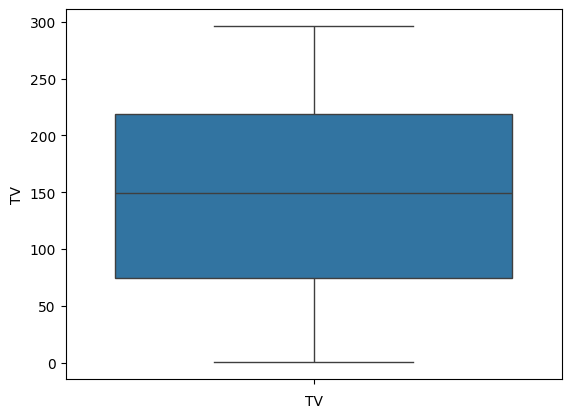

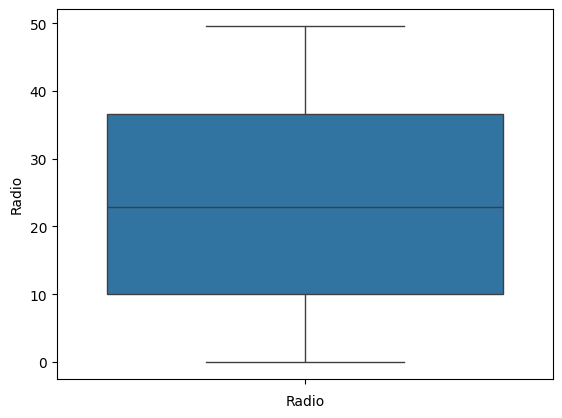

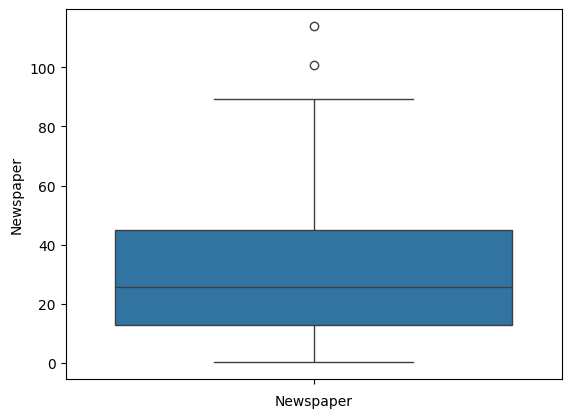

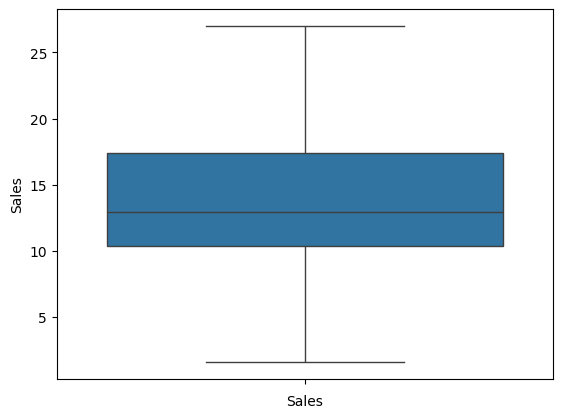

In [20]:
for col in df:
    sns.boxplot(data=df[col])
    plt.xlabel(col)
    plt.show()

### Visualizating the Dataset

#### Plotting the distributions of columns

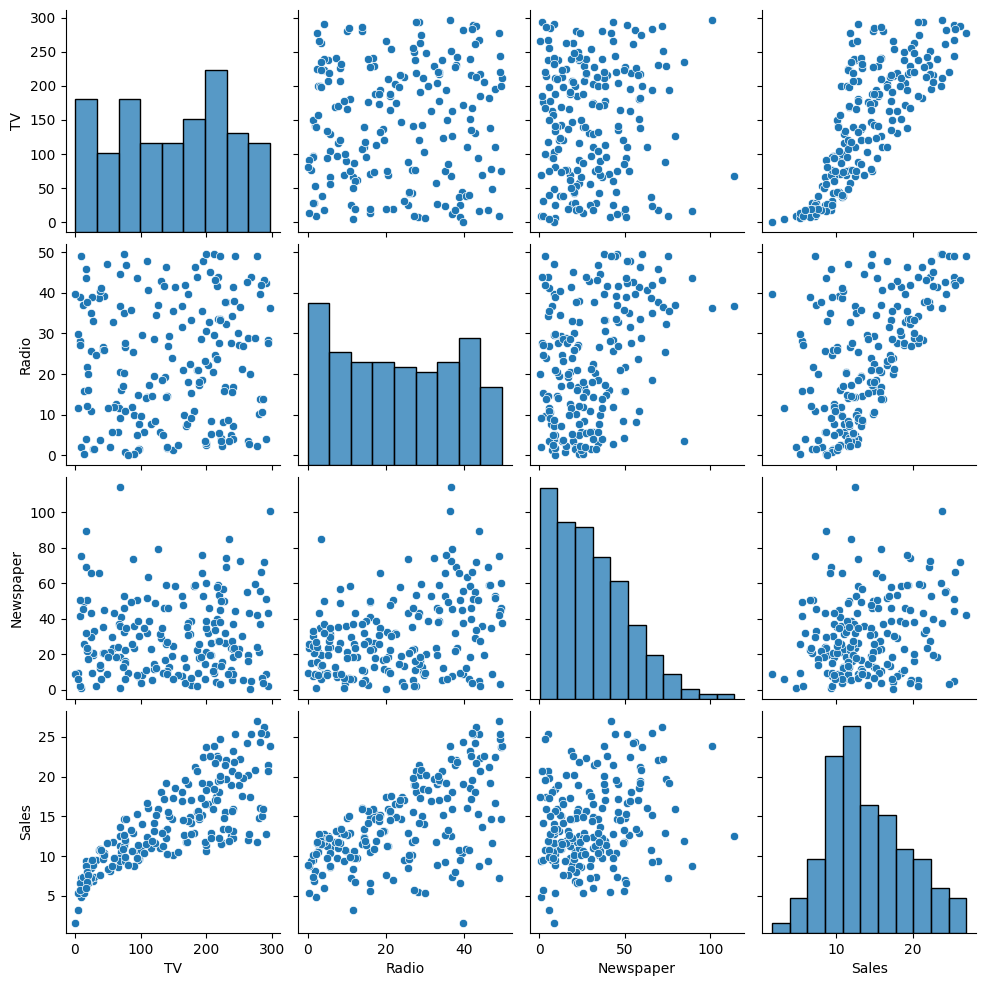

In [21]:
sns.pairplot( data = df )
plt.show()

### Correlation Analysis

<Axes: >

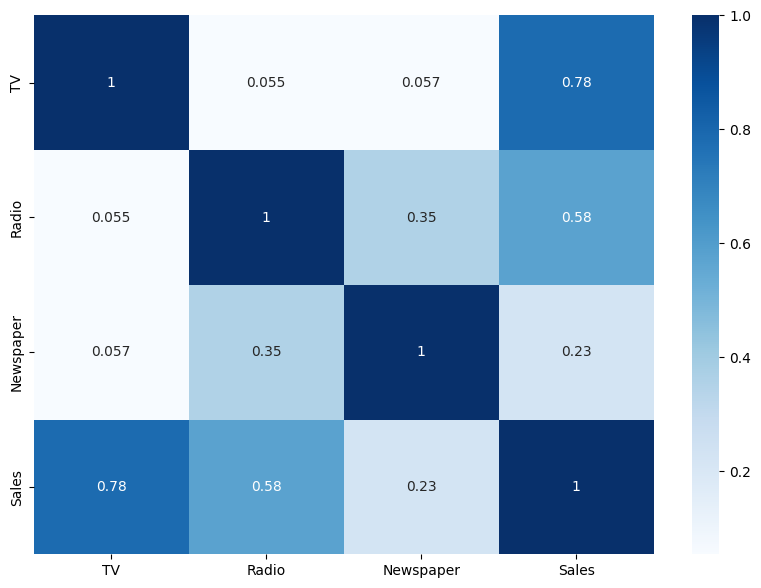

In [24]:
plt.figure(figsize = (10,7))
sns.heatmap(df.corr(),cmap="Blues", annot=True)

### Feature Selection

#### Splitting the dataset

In [25]:
X=df[['TV', 'Radio', 'Newspaper']]
Y=df[ 'Sales']

### Creating the Model

#### Split dataset into training set and test set

In [26]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.3, random_state=1)

In [30]:
X_train

TV  Radio  Newspaper
116  139.2   14.3       25.6
67   139.3   14.5       10.2
78     5.4   29.9        9.4
42   293.6   27.7        1.8
17   281.4   39.6       55.8
..     ...    ...        ...
133  219.8   33.5       45.1
137  273.7   28.9       59.7
72    26.8   33.0       19.3
140   73.4   17.0       12.9
37    74.7   49.4       45.7

[140 rows x 3 columns]

In [31]:
X_test

TV  Radio  Newspaper
58   210.8   49.6       37.7
40   202.5   22.3       31.6
34    95.7    1.4        7.4
102  280.2   10.1       21.4
184  253.8   21.3       30.0
198  283.6   42.0       66.2
95   163.3   31.6       52.9
4    180.8   10.8       58.4
29    70.6   16.0       40.8
168  215.4   23.6       57.6
171  164.5   20.9       47.4
18    69.2   20.5       18.3
11   214.7   24.0        4.0
89   109.8   47.8       51.4
110  225.8    8.2       56.5
118  125.7   36.9       79.2
159  131.7   18.4       34.6
35   290.7    4.1        8.5
136   25.6   39.0        9.3
59   210.7   29.5        9.3
51   100.4    9.6        3.6
16    67.8   36.6      114.0
44    25.1   25.7       43.3
94   107.4   14.0       10.9
31   112.9   17.4       38.6
162  188.4   18.1       25.6
38    43.1   26.7       35.1
28   248.8   27.1       22.9
193  166.8   42.0        3.6
27   240.1   16.7       22.9
47   239.9   41.5       18.5
165  234.5    3.4       84.8
194  149.7   35.6        6.0
177  170.2    7.8       35.2
176  248.4   30.2       20.3
97   184.9   21.0       22.0
174  222.4    3.4       13.1
73   129.4    5.7       31.3
69   216.8   43.9       27.2
172   19.6   20.1       17.0
108   13.1    0.4       25.6
107   90.4    0.3       23.2
189   18.7   12.1       23.4
14   204.1   32.9       46.0
56     7.3   28.1       41.4
19   147.3   23.9       19.1
114   78.2   46.8       34.5
39   228.0   37.7       32.0
185  205.0   45.1       19.6
124  229.5   32.3       74.2
98   289.7   42.3       51.2
123  123.1   34.6       12.4
119   19.4   16.0       22.3
53   182.6   46.2       58.7
33   265.6   20.0        0.3
179  165.6   10.0       17.6
181  218.5    5.4       27.4
106   25.0   11.0       29.7
199  232.1    8.6        8.7
138   43.0   25.9       20.5

In [32]:
Y_train

116    12.2
67     13.4
78      5.3
42     20.7
17     24.4
       ... 
133    19.6
137    20.8
72      8.8
140    10.9
37     14.7
Name: Sales, Length: 140, dtype: float64

In [33]:
Y_test

58     23.8
40     16.6
34      9.5
102    14.8
184    17.6
198    25.5
95     16.9
4      12.9
29     10.5
168    17.1
171    14.5
18     11.3
11     17.4
89     16.7
110    13.4
118    15.9
159    12.9
35     12.8
136     9.5
59     18.4
51     10.7
16     12.5
44      8.5
94     11.5
31     11.9
162    14.9
38     10.1
28     18.9
193    19.6
27     15.9
47     23.2
165    11.9
194    17.3
177    11.7
176    20.2
97     15.5
174    11.5
73     11.0
69     22.3
172     7.6
108     5.3
107     8.7
189     6.7
14     19.0
56      5.5
19     14.6
114    14.6
39     21.5
185    22.6
124    19.7
98     25.4
123    15.2
119     6.6
53     21.2
33     17.4
179    12.6
181    12.2
106     7.2
199    13.4
138     9.6
Name: Sales, dtype: float64

In [27]:
print('X_train:', X_train.shape)

print('Y_train:', Y_train.shape)

print('x_test:', X_test.shape)

print('Y_test:',Y_test.shape)

X_train: (140, 3)
Y_train: (140,)
x_test: (60, 3)
Y_test: (60,)


#### fitting the model using Linear regression

In [28]:
Lr=LinearRegression()
Lr.fit(X_train, Y_train)

LinearRegression()

In [29]:
y_pred=Lr.predict(X_test)

### Plotting Y_test and y_pred data

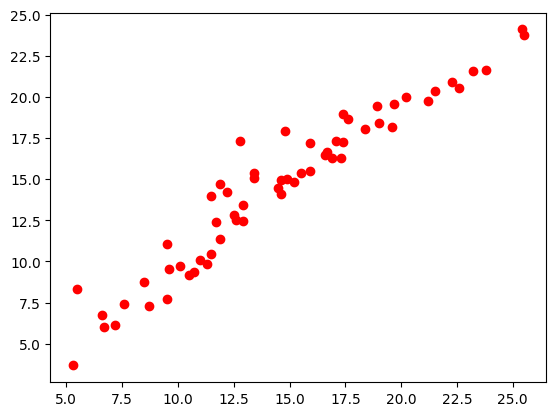

In [35]:
plt.scatter(Y_test, y_pred, c= 'r')

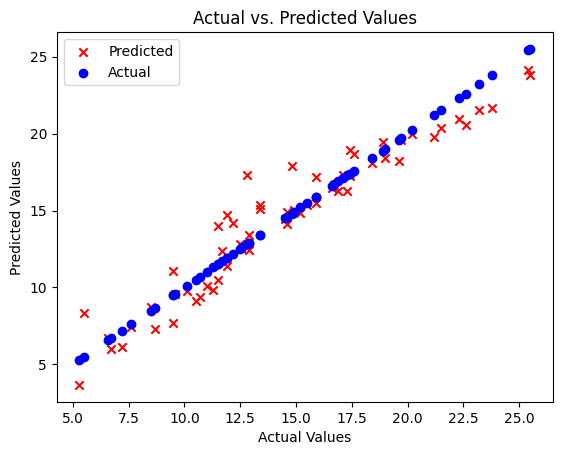

In [39]:
plt.scatter(Y_test, y_pred, c='r', label='Predicted', marker='x')
plt.scatter(Y_test, Y_test, c='b', label='Actual', marker='o')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

### Evaluating the Model

In [43]:
# we can evaluate the performance of the model using the r2_score function

ev1=r2_score (Y_test, y_pred)
ev1*=100

print("Accuracy: ", ev1, '%')

Accuracy:  92.24605706201434 %


In [44]:
MAE=mean_absolute_error(Y_test,y_pred)

print("Mean Absolute Error:", MAE)

Mean Absolute Error: 1.0548328405073322


In [46]:
MSE=mean_squared_error(Y_test,y_pred) 

print("Root Mean Squared Error:", np.sqrt(MSE))

Root Mean Squared Error: 1.3888574107756975


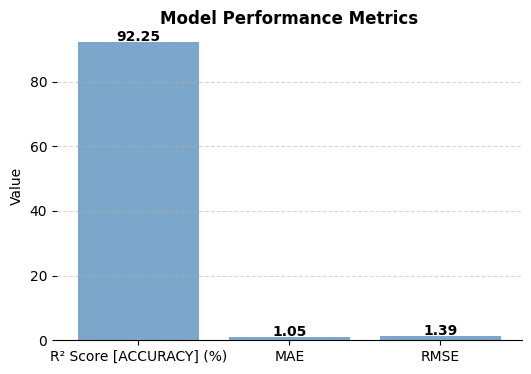

In [52]:
# Model performance values
metrics = ["R² Score [ACCURACY] (%)", "MAE", "RMSE"]
values = [92.24605706201434, 1.0548328405073322, 1.3888574107756975]  # Your evaluation results

# Create a small figure with a soft color palette
plt.figure(figsize=(6, 4), dpi=100)
plt.bar(metrics, values, color='#4682B4', alpha=0.7)  # Soft blue color

# Adding text labels on bars
for i, v in enumerate(values):
    plt.text(i, v + 0.3, str(round(v, 2)), ha='center', fontsize=10, fontweight='bold')

# Minimalist style adjustments
plt.ylabel("Value", fontsize=10)
plt.title("Model Performance Metrics", fontsize=12, fontweight='bold')
plt.ylim(0, max(values) + 3)  # Adjust y-axis for better spacing
plt.grid(axis="y", linestyle="--", alpha=0.5)  # Light grid lines

# Remove spines for a cleaner look
for spine in ['top', 'right', 'left']:
    plt.gca().spines[spine].set_visible(False)

# Show the plot
plt.show()


### Conclusion

*The lower value of MAE and RMSE implies higher accuracy of a regression model.*